In [23]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [24]:
df = pd.read_csv('train.csv')

In [25]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [26]:
#How many rows of data
print('This dataset has', df.shape[0], 'houses and', df.shape[1], 'features')

This dataset has 1460 houses and 81 features


In [27]:
#Features
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [28]:
#Groupby number of bedrooms
df.groupby('BedroomAbvGr')['SalePrice'].agg(['count', 'mean', 'median'])

,count,mean,median
BedroomAbvGr,,,
0,6,221493.166667,202500
1,50,173162.420000,145250
2,358,158197.659218,137250
3,804,181056.870647,169945
4,213,220421.253521,193500
5,21,180819.047619,161500
6,7,143779.000000,141000
8,1,200000.000000,200000


In [29]:
#Groupby Overal Quality and Condition
display(df.groupby('OverallQual')['SalePrice'].agg(['mean', 'median']))
df.groupby('OverallCond')['SalePrice'].agg(['mean', 'median'])

,mean,median
OverallQual,,
1,50150.000000,50150
2,51770.333333,60000
3,87473.750000,86250
4,108420.655172,108000
5,133523.347607,133000
6,161603.034759,160000
7,207716.423197,200141
8,274735.535714,269750
9,367513.023256,345000


,mean,median
OverallCond,,
1,61000.000000,61000
2,141986.400000,85000
3,101929.400000,89500
4,120438.438596,115000
5,203146.914738,185000
6,153961.591270,142750
7,158145.487805,145000
8,155651.736111,142500
9,216004.545455,176200


The mean of all houses is 180921.19589041095
The standard deviation is 79442.50288288662


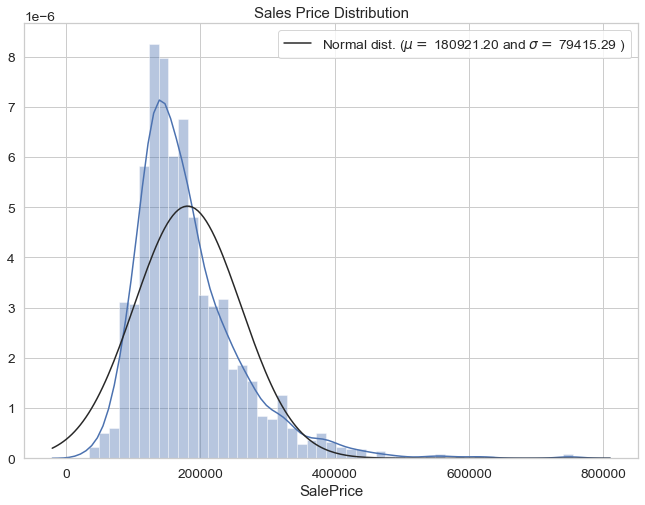

In [30]:
#Explore the Target Variable SalePrice
print('The mean of all houses is', df.SalePrice.mean())
print('The standard deviation is', df.SalePrice.std())
plt.subplots(figsize=(11, 8))
sns.distplot(df.SalePrice, fit = norm).set_title('Sales Price Distribution')
(mu, sigma) = norm.fit(df.SalePrice.dropna())
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.show()

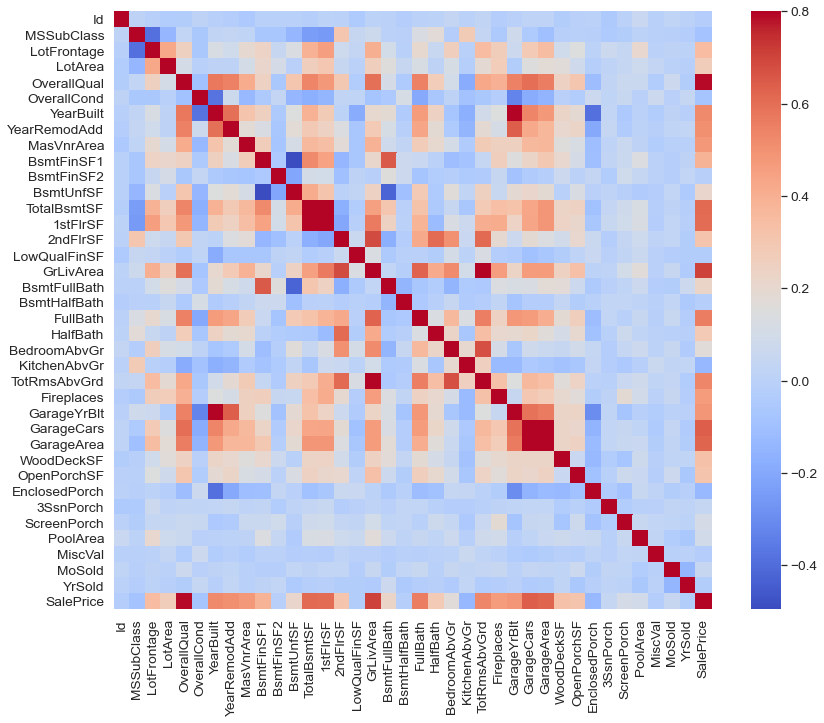

In [31]:
#Correlation between Features
corrmat =df.corr()
f, ax = plt.subplots(figsize=(14, 11))
sns.heatmap(corrmat,cmap='coolwarm', vmax=.8, square=True);

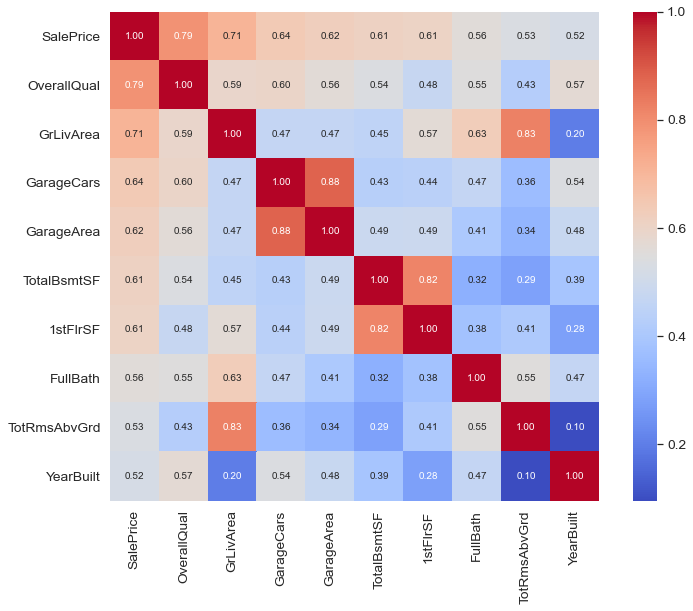

In [35]:
#Number of variables for heatmap 
f, ax = plt.subplots(figsize=(12, 9))
cols = corrmat.nlargest(10, 'SalePrice').index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap='coolwarm', annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

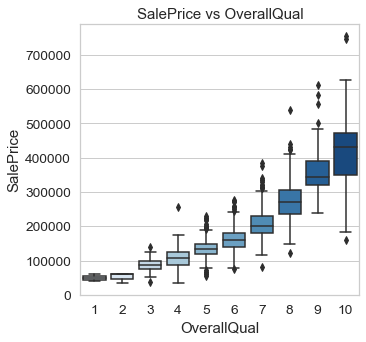

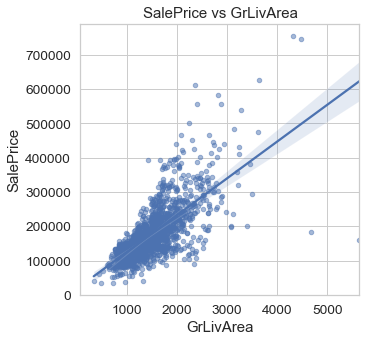

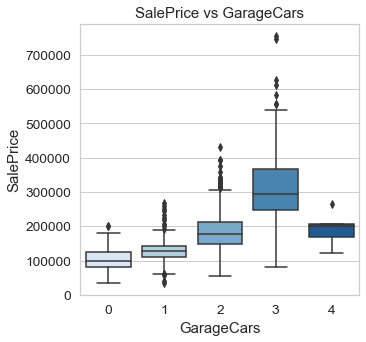

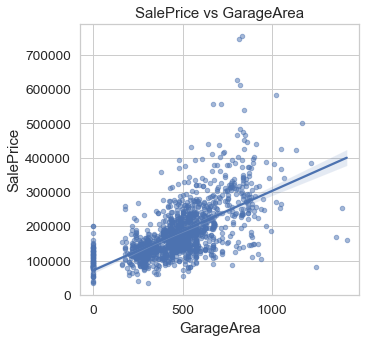

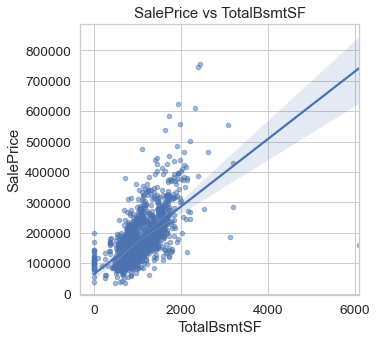

In [42]:
#Plotting Top 4 correlated variables with SalePrice
top_5 =  [x for x in corrmat.nlargest(11, 'SalePrice').index]

sns.set_style("whitegrid")
for var in top_5[1:6]:
    if var == 'GrLivArea' or var == 'GarageArea' or var == 'TotalBsmtSF':
        plt.figure(figsize=(5,5))
        g = sns.regplot(y = 'SalePrice', x = var, data = df, x_jitter = 0.1, scatter_kws = {'s': 20, 'alpha': .5})
        title = 'SalePrice vs ' + var
        g.set_title(title)
        plt.show()
    else:
        plt.figure(figsize=(5,5))
        g = sns.boxplot(y = 'SalePrice', x = var, data = df, palette="Blues")
        title = 'SalePrice vs ' + var
        g.set_title(title)
        plt.show()

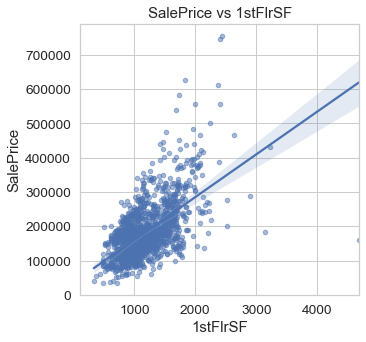

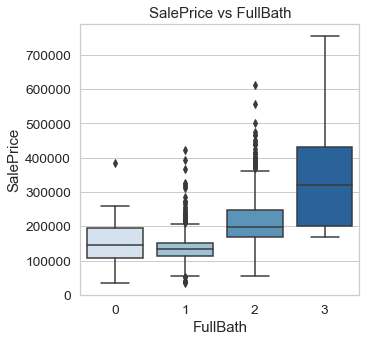

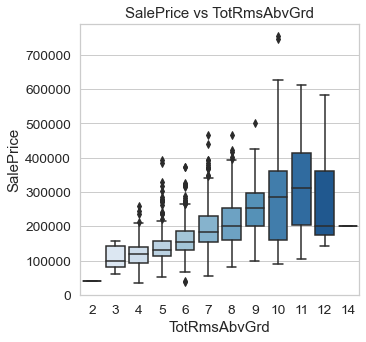

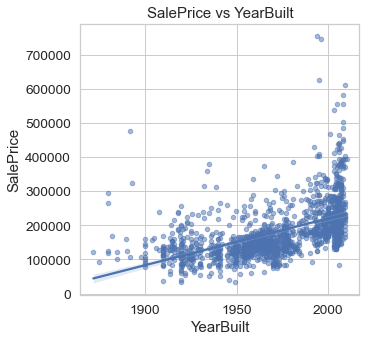

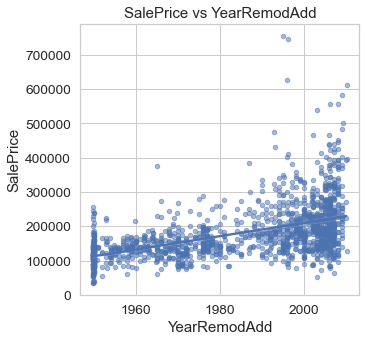

In [43]:
sns.set_style("whitegrid")
for var in top_5[6:11]:
    if var == 'FullBath' or var == 'TotRmsAbvGrd':
        plt.figure(figsize=(5,5))
        g = sns.boxplot(y = 'SalePrice', x = var, data = df, palette="Blues")
        title = 'SalePrice vs ' + var
        g.set_title(title)
        plt.show()
    else:
        plt.figure(figsize=(5,5))
        g = sns.regplot(y = 'SalePrice', x = var, data = df, x_jitter = 0.1, scatter_kws = {'s': 20, 'alpha': .5})
        title = 'SalePrice vs ' + var
        g.set_title(title)
        plt.show()